In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diamond_df=pd.read_csv('/content/drive/MyDrive/DataSets/diamonds (1).csv')
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


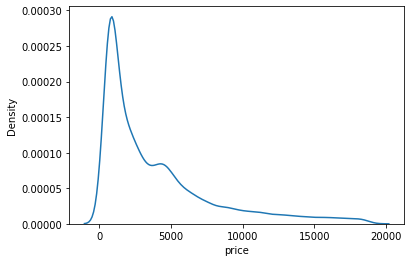

In [5]:
sns.kdeplot(diamond_df.price)

In [6]:
print('The Skewness of the distribution is ',diamond_df.price.kurt())
print('The Kurtosis of the distribution is ',diamond_df.price.skew())

The Skewness of the distribution is  2.17769575924869
The Kurtosis of the distribution is  1.618395283383529


## Observations:

- Since the skewness is greater than 1 there seem to be lot of prices which are extreme values. 
- Even the kurtosis is greater which indicates flatter tails which is clearly a lot to the right.

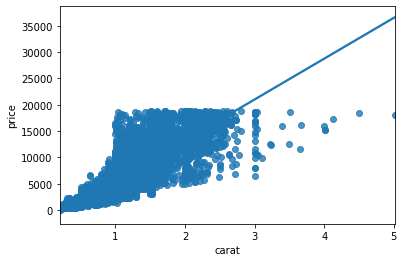

In [7]:
sns.regplot(x=diamond_df.carat,y=diamond_df.price)
plt.show()

##Observations:

- We can see that there exists some relationship between carat and the price of the diamonds.

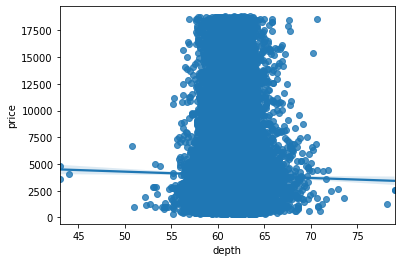

In [8]:
sns.regplot(x=diamond_df.depth,y=diamond_df.price)
plt.show()

## Observations:

- There is not much effect of depth on diamond Price

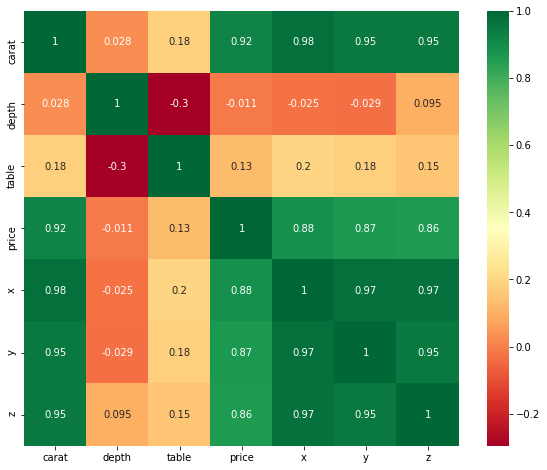

In [9]:
plt.figure(figsize=(10,8))
p=sns.heatmap(diamond_df.corr(), annot=True,cmap='RdYlGn',square=True)

## Observations:

- From the above heatmap we can see that only Carat,x,y,z have good affect on price variable. so let's consider these and build our model.

In [10]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [11]:
print("Number of rows with x == 0: {} ".format((diamond_df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamond_df.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [12]:
diamond_df[['x','y','z']]=diamond_df[['x','y','z']].replace(0,np.NaN)

In [13]:
diamond_df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

## Treatment of data for missing values

In [14]:
diamond_df.dropna(inplace=True)

In [15]:
diamond_df.shape

(53920, 10)

In [16]:
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## What to do with the zero's in x,y and z?

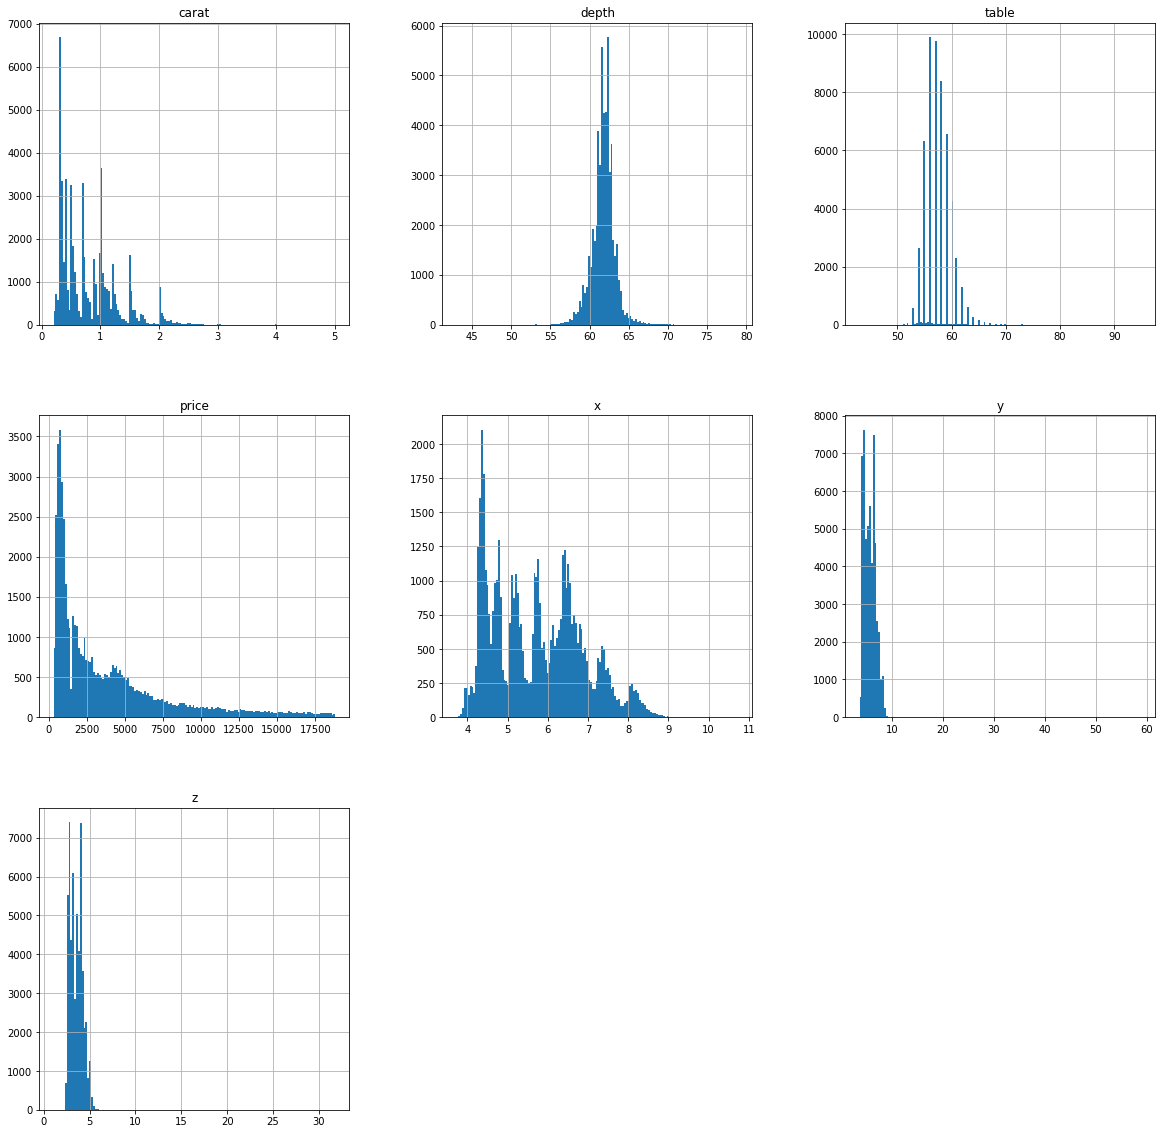

In [17]:
p = diamond_df.hist(figsize = (20,20),bins=150)

## Categorical Data Essense

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


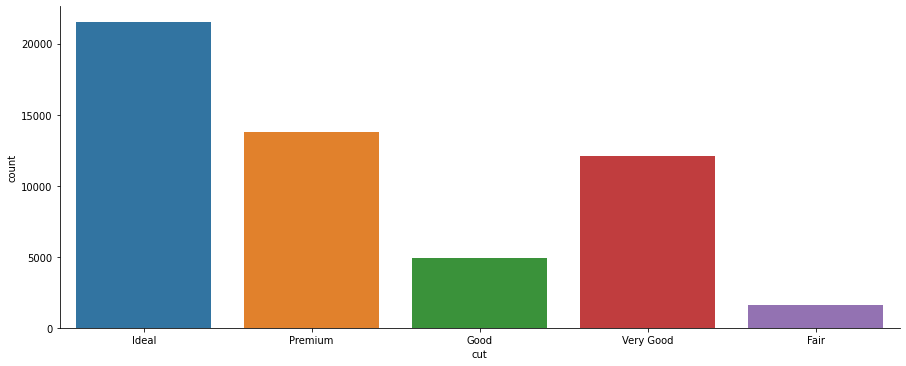

In [18]:
p = sns.factorplot(x='cut', data=diamond_df , kind='count',aspect=2.5 )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


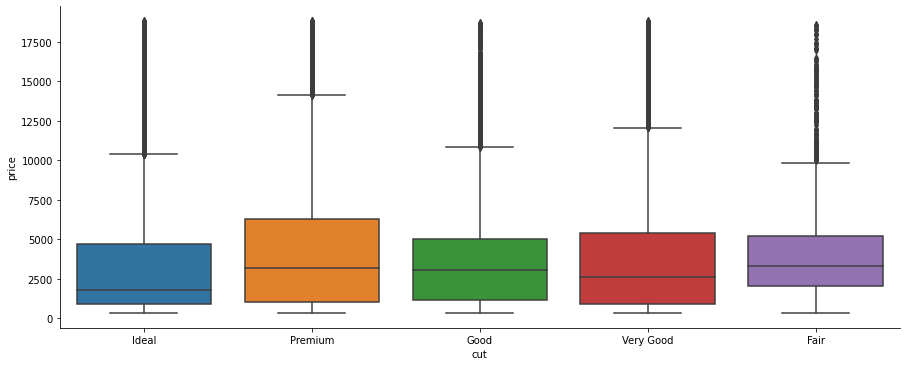

In [19]:
p = sns.factorplot(x='cut',y='price',data=diamond_df , kind='box',aspect=2.5 )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


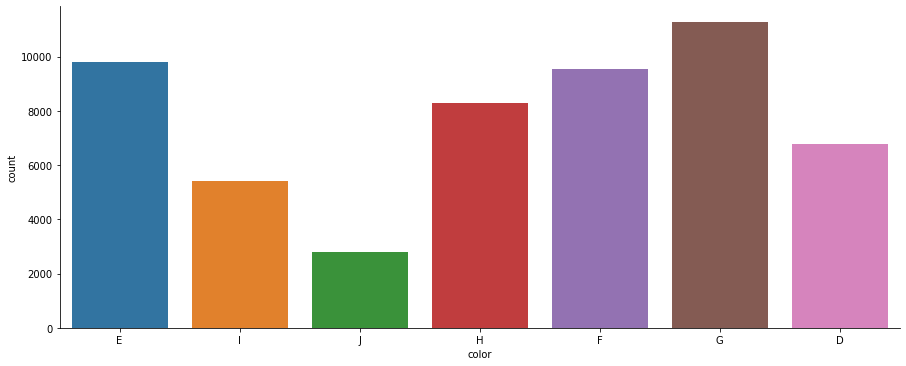

In [20]:
p = sns.factorplot(x='color', data=diamond_df , kind='count',aspect=2.5 )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


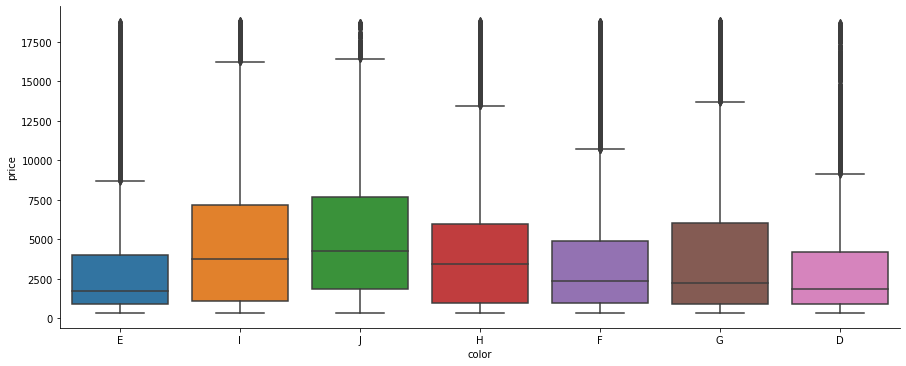

In [21]:
p = sns.factorplot(x='color', y='price', data=diamond_df, kind='box' ,aspect=2.5 )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


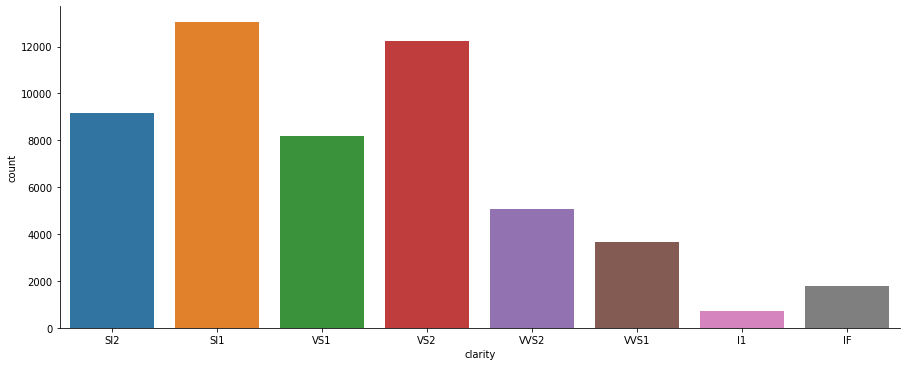

In [22]:
p = sns.factorplot(x='clarity', data=diamond_df , kind='count',aspect=2.5 )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


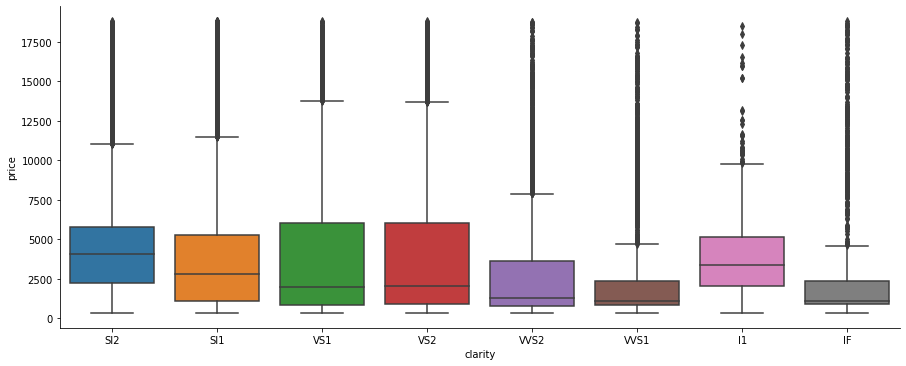

In [23]:
p = sns.factorplot(x='clarity', y='price', data=diamond_df, kind='box' ,aspect=2.5)

Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive.

In [24]:
diamond_clean_data_ =  pd.get_dummies(diamond_df,drop_first=True)
diamond_clean_data_.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [25]:
X=diamond_clean_data_.drop('price',axis=1)
Y=diamond_clean_data_['price']

In [26]:
numerical_col=X.select_dtypes(include=['int64','float64'])
numerical_col

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =pd.DataFrame(sc_X.fit_transform(numerical_col),columns=['carat','depth','x','y','z','table'],index=numerical_col.index)

In [28]:
numericals

,carat,depth,x,y,z,table
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583
...,...,...,...,...,...,...
53935,-0.163993,-0.662921,-0.204488,0.016413,0.022027,-0.057004
53936,-0.163993,0.942868,-1.099725,-0.037186,0.013256,0.099575
53937,-0.206205,0.733417,1.138369,-0.063986,-0.048142,0.028403
53938,0.131496,-0.523288,0.243131,0.373744,0.337784,0.284622


In [29]:
cat_col=X.select_dtypes(include='uint8')
cat_col

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [30]:
Scaled_df=pd.concat([numericals,cat_col],axis=1)
Scaled_df

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.163993,-0.662921,-0.204488,0.016413,0.022027,-0.057004,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,-0.163993,0.942868,-1.099725,-0.037186,0.013256,0.099575,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,-0.206205,0.733417,1.138369,-0.063986,-0.048142,0.028403,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0.131496,-0.523288,0.243131,0.373744,0.337784,0.284622,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [31]:
Scaled_df=pd.concat([Scaled_df,Y],axis=1)

In [32]:
Scaled_df

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,326
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,326
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,327
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,334
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.163993,-0.662921,-0.204488,0.016413,0.022027,-0.057004,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2757
53936,-0.163993,0.942868,-1.099725,-0.037186,0.013256,0.099575,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2757
53937,-0.206205,0.733417,1.138369,-0.063986,-0.048142,0.028403,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2757
53938,0.131496,-0.523288,0.243131,0.373744,0.337784,0.284622,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2757


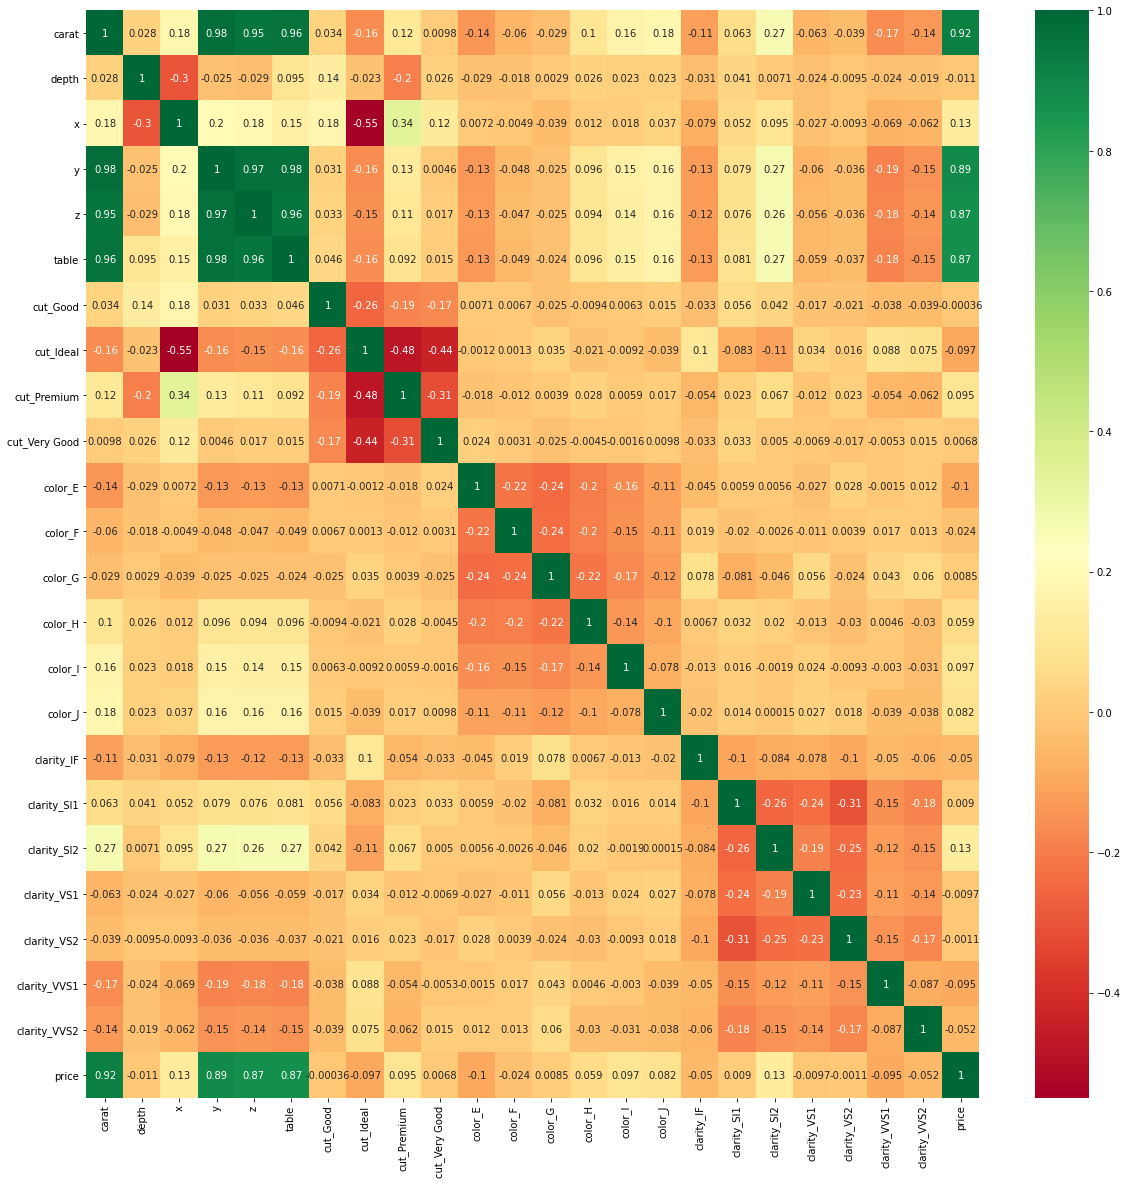

In [33]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(Scaled_df.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

In [34]:
X=Scaled_df.drop('price',axis=1)
Y=Scaled_df['price']

In [35]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state = 2,test_size=0.3)

In [36]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((37744, 23), (16176, 23), (37744,), (16176,))

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21078518476793%
Mean absolute error: 731.4415989248854
Mean squared error: 1222201.224070932
R Squared: 0.9221078518476793
Adjusted R Squared: 0.9220017646032448


In [38]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21251312655805%
Mean absolute error: 730.9559569073443
Mean squared error: 1221930.0937168328
R Squared: 0.9221251312655805
Adjusted R Squared: 0.9220190675553002


In [39]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.19606031078703%
Mean absolute error: 727.3706847509555
Mean squared error: 1224511.6955922148
R Squared: 0.9219606031078703
Adjusted R Squared: 0.921854315314171


## Using all the regressors of Classification models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import train_test_split

In [43]:
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, 
                                                                  Y, 
                                                                  shuffle=True,
                                                                  test_size=0.2, 
                                                                  random_state=100)

In [44]:
X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate,
                                                                y_intermediate,
                                                                shuffle=False,
                                                                test_size=0.25,
                                                                random_state=100)

In [45]:
# delete intermediate variables
del X_intermediate, y_intermediate

In [47]:
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(Y),2),
                                                       round(len(y_validation)/len(Y),2),
                                                       round(len(y_test)/len(Y),2)))

train: 0.6% | validation: 0.2% | test 0.2%


In [48]:
X_train

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
39219,-0.733864,-3.455598,2.033607,-0.564249,-0.521778,-0.896833,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
14092,0.828006,-1.081823,-0.204488,0.990138,0.995612,0.839763,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
18017,0.954644,0.384332,0.243131,1.008005,1.013155,1.053279,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
9337,0.300347,0.174882,0.243131,0.480943,0.443037,0.483903,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3218,-0.185099,0.803234,1.138369,0.007480,-0.056913,0.071106,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,-0.818290,-1.361090,-0.204488,-0.823313,-0.776138,-0.925302,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
22628,1.862218,-0.453471,-0.204488,1.704799,1.723609,1.636889,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
49876,-0.206205,-0.593104,2.033607,-0.010387,-0.056913,-0.099707,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
8358,-0.058461,-1.081823,0.243131,0.177212,0.206219,0.056872,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [49]:
X_test

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
6797,0.448092,1.571220,0.243131,0.516676,0.557060,0.740122,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
30232,-0.987141,-0.872372,-0.652106,-1.118111,-1.074354,-1.167286,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7429,0.237028,0.733417,-0.204488,0.391610,0.337784,0.455435,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35524,-0.776077,-1.361090,0.243131,-0.751847,-0.697199,-0.854130,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
38052,-0.839396,-0.872372,-0.204488,-0.867979,-0.828765,-0.925302,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,0.469198,1.710853,1.585988,0.507742,0.416724,0.683185,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
33431,-1.008247,0.244698,-0.652106,-1.162777,-1.170835,-1.138817,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
39122,-0.818290,-0.244020,0.690750,-0.841180,-0.863849,-0.868364,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
40874,-0.142886,3.037375,0.243131,-0.090786,-0.206020,0.199215,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
37864,-0.902715,-0.244020,-1.099725,-0.975178,-0.934017,-0.968005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1003
3846,0.089284,-0.034569,-1.099725,0.302277,0.329013,0.313091,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3475
33526,-0.944928,0.035248,-0.652106,-1.091311,-1.039270,-1.053411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,829
30126,-1.008247,-0.034569,-0.204488,-1.189577,-1.188377,-1.181521,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,720
42743,-0.607226,1.222135,-0.204488,-0.608915,-0.591946,-0.469801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16313,0.448092,1.222135,0.690750,0.561342,0.504434,0.683185,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,6529
79,-1.134885,0.593783,0.690750,-1.493307,-1.442738,-1.409271,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,554
12126,1.060176,0.105065,-0.204488,1.142004,1.065781,1.110217,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,5169
14155,0.785793,0.593783,-1.099725,0.900806,0.916673,0.982107,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,5743


In [ ]:
X_train=train.drop('price',axis=1)
Y_train=train['price']

X_valid=validate.drop('price',axis=1)
Y_valid=validate['price']

X_test=test.drop('price',axis=1)
Y_test=test['price']

In [ ]:
dt_reg=DecisionTreeRegressor()

In [ ]:
dt_reg.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = dt_reg.predict(X_test)
print("accuracy: "+ str(dt_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(Y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(Y_test,y_pred)))
print("Root Mean squared error: {}".format(np.sqrt(mean_squared_error(Y_test,y_pred))))
R2 = r2_score(Y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: -198.00648989071328%
Mean absolute error: 403.2022440652819
Mean squared error: 758040.628013724
Root Mean squared error: 870.6552865593386
R Squared: 0.9530166243942573
Adjusted R Squared: 0.9529205706573066


In [ ]:
knn_reg=KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
y_pred = knn_reg.predict(X_test)
print("accuracy: "+ str(knn_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(Y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(Y_test,y_pred)))
print("Root Mean squared error: {}".format(np.sqrt(mean_squared_error(Y_test,y_pred))))
R2 = r2_score(Y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 0.18250642233762496%
Mean absolute error: 446.6574925816024
Mean squared error: 760481.5456268546
Root Mean squared error: 872.0559303317963
R Squared: 0.9528653362643046
Adjusted R Squared: 0.9527689732309261


In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)
print("accuracy: "+ str(rf.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(Y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(Y_test,y_pred)))
print("Root Mean squared error: {}".format(np.sqrt(mean_squared_error(Y_test,y_pred))))
R2 = r2_score(Y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: -199.48897431475507%
Mean absolute error: 309.1312378402307
Mean squared error: 440252.36900376424
Root Mean squared error: 663.5151610956333
R Squared: 0.9727131480163258
Adjusted R Squared: 0.9726573622395727
